<a href="https://colab.research.google.com/github/manassanant132/Time_Series/blob/main/LSTM%26GRU%26CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,GRU,Dense,Dropout

In [ ]:
df1 = pd.read_csv("/content/DailyDelhiClimateTrain.csv")
df1.index = pd.to_datetime(df1.index)
df1.head()

,date,meantemp,humidity,wind_speed,meanpressure
1970-01-01 00:00:00.000000000,2017-01-01,15.913043,85.869565,2.743478,59.000000
1970-01-01 00:00:00.000000001,2017-01-02,18.500000,77.222222,2.894444,1018.277778
1970-01-01 00:00:00.000000002,2017-01-03,17.111111,81.888889,4.016667,1018.333333
1970-01-01 00:00:00.000000003,2017-01-04,18.700000,70.050000,4.545000,1015.700000
1970-01-01 00:00:00.000000004,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [ ]:
df2 = pd.read_csv("/content/DailyDelhiClimateTest.csv")
df2.index = pd.to_datetime(df2.index)
df2.head()

,date,meantemp,humidity,wind_speed,meanpressure
1970-01-01 00:00:00.000000000,2017-01-01,15.913043,85.869565,2.743478,59.000000
1970-01-01 00:00:00.000000001,2017-01-02,18.500000,77.222222,2.894444,1018.277778
1970-01-01 00:00:00.000000002,2017-01-03,17.111111,81.888889,4.016667,1018.333333
1970-01-01 00:00:00.000000003,2017-01-04,18.700000,70.050000,4.545000,1015.700000
1970-01-01 00:00:00.000000004,2017-01-05,18.388889,74.944444,3.300000,1014.333333


<function matplotlib.pyplot.show(close=None, block=None)>

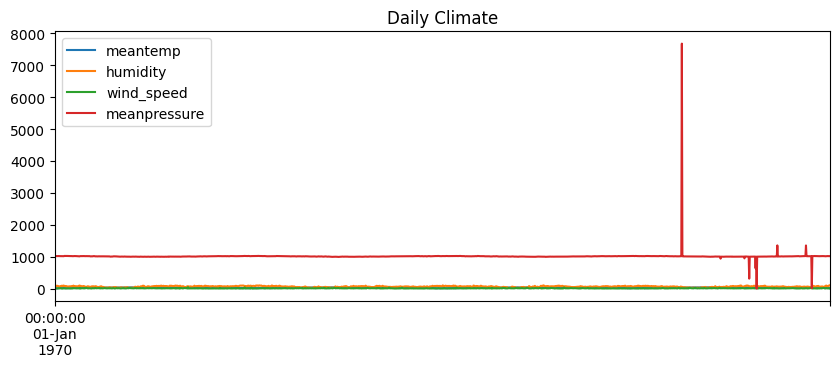

In [ ]:
df1.plot(figsize=(10,3.5),legend=True)
plt.title('Daily Climate')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

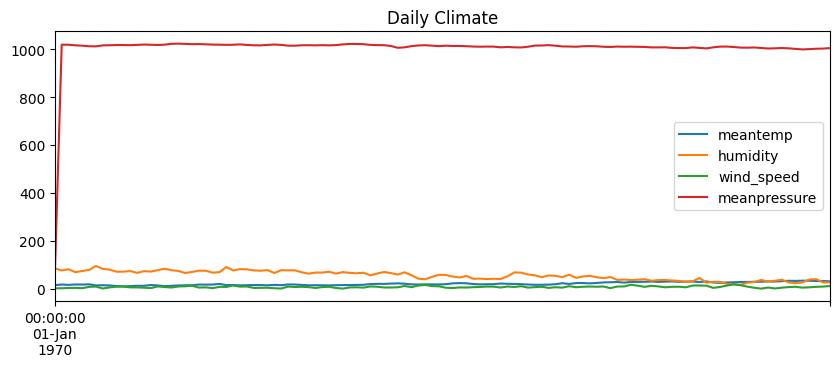

In [ ]:
df2.plot(figsize=(10,3.5),legend=True)
plt.title('Daily Climate')
plt.show

In [ ]:
df = pd.read_csv('/content/Month_Value_1.csv')


,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...,...
91,01.08.2022,NaN,NaN,NaN,NaN
92,01.09.2022,NaN,NaN,NaN,NaN
93,01.10.2022,NaN,NaN,NaN,NaN
94,01.11.2022,NaN,NaN,NaN,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

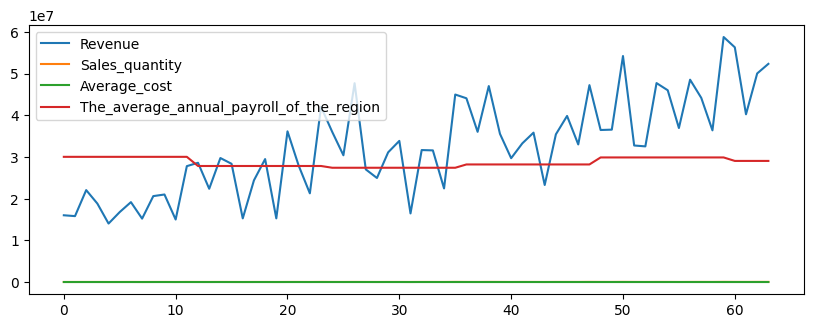

In [ ]:
df.plot(figsize=(10,3.5),legend=True)
plt.show

##TRAIN

<function matplotlib.pyplot.show(close=None, block=None)>

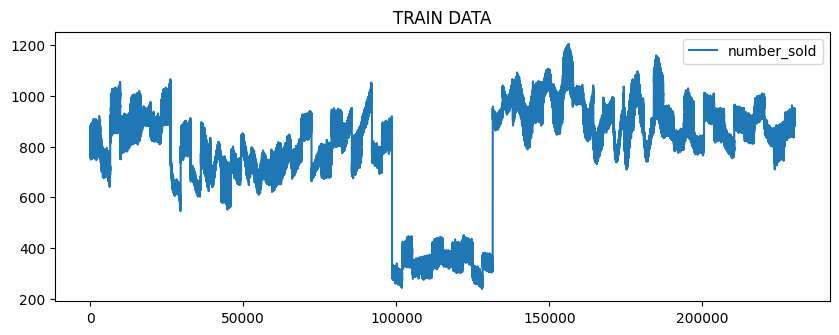

In [ ]:
df = pd.read_csv('/content/train.csv',usecols=['number_sold'])
df.plot(figsize=(10,3.5),legend=True)
plt.title('TRAIN DATA')
plt.show

In [ ]:
df

,number_sold
0,801
1,810
2,818
3,796
4,808
...,...
230085,890
230086,892
230087,895
230088,899


In [ ]:
from sklearn.preprocessing import MinMaxScaler

data = df.values.reshape(-1,1)
sc=MinMaxScaler()
data_sc = sc.fit_transform(data)

In [ ]:
def convertToMetrix(data,step=1):
  X,Y=[],[]
  for i in range(len(data)-step):
    d=i+step
    X.append(data[i:d,])
    Y.append(data[d,])
  return np.array(X),np.array(Y)

# n_train = 67

# train,test = data_sc[0:n_train],data_sc[n_train:]
# train.shape,test.shape

In [ ]:
train = data_sc
train.shape

(230090, 1)

##TEST


<function matplotlib.pyplot.show(close=None, block=None)>

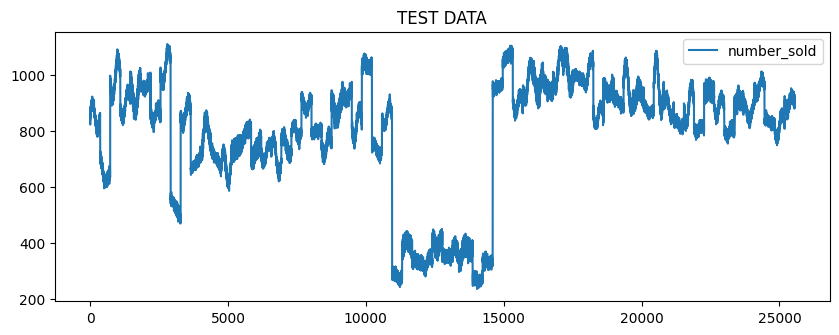

In [ ]:
df1 = pd.read_csv('/content/test.csv',usecols=['number_sold'])
df1.plot(figsize=(10,3.5),legend=True)
plt.title('TEST DATA')
plt.show

In [ ]:
data1 = df1.values.reshape(-1,1)
sc=MinMaxScaler()
data1_sc = sc.fit_transform(data1)

In [ ]:
test = data1_sc
test.shape

(25550, 1)

In [ ]:
step = 500
X_train,y_train = convertToMetrix(train,step)
X_test,y_test = convertToMetrix(test,step)

print('X_Train,Test(after conversatiob):',X_train.shape,X_test.shape)
print('y_Train,Test(after conversatiob):',y_train.shape,y_test.shape)

X_Train,Test(after conversatiob): (229590, 500, 1) (25050, 500, 1)
y_Train,Test(after conversatiob): (229590, 1) (25050, 1)


In [ ]:
X_train

array([[[0.58221303],
        [0.59152017],
        [0.59979317],
        ...,
        [0.66701138],
        [0.63288521],
        [0.65873837]],

       [[0.59152017],
        [0.59979317],
        [0.5770424 ],
        ...,
        [0.63288521],
        [0.65873837],
        [0.65356774]],

       [[0.59979317],
        [0.5770424 ],
        [0.58945191],
        ...,
        [0.65873837],
        [0.65356774],
        [0.63391934]],

       ...,

       [[0.68355739],
        [0.71354705],
        [0.73009307],
        ...,
        [0.68045502],
        [0.67425026],
        [0.67631851]],

       [[0.71354705],
        [0.73009307],
        [0.72078594],
        ...,
        [0.67425026],
        [0.67631851],
        [0.67942089]],

       [[0.73009307],
        [0.72078594],
        [0.71458118],
        ...,
        [0.67631851],
        [0.67942089],
        [0.68355739]]])

## GRU

In [ ]:
model = Sequential()
model.add(GRU(units=50,return_sequences=True,input_shape=(step,1),activation='relu'))
model.add(Dropout(0.2))
model.add(GRU(units=40,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error',optimizer='rmsprop')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 500, 50)           7950      
                                                                 
 dropout (Dropout)           (None, 500, 50)           0         
                                                                 
 gru_1 (GRU)                 (None, 40)                11040     
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense (Dense)               (None, 1)                 41        
                                                                 
Total params: 19031 (74.34 KB)
Trainable params: 19031 (74.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history =  model.fit(X_train,y_train,epochs=20,batch_size=2048,verbose=1)

Epoch 1/20
113/113 [==============================] - 196s 2s/step - loss: 0.0304
Epoch 2/20
113/113 [==============================] - 180s 2s/step - loss: 0.0060
Epoch 3/20
113/113 [==============================] - 177s 2s/step - loss: 0.0050
Epoch 4/20
113/113 [==============================] - 176s 2s/step - loss: 0.0045
Epoch 5/20
113/113 [==============================] - 176s 2s/step - loss: 0.0041
Epoch 6/20
113/113 [==============================] - 174s 2s/step - loss: 0.0038
Epoch 7/20
113/113 [==============================] - 174s 2s/step - loss: 0.0036
Epoch 8/20
113/113 [==============================] - 175s 2s/step - loss: 0.0033
Epoch 9/20
113/113 [==============================] - 176s 2s/step - loss: 0.0031
Epoch 10/20
113/113 [==============================] - 175s 2s/step - loss: 0.0028
Epoch 11/20
113/113 [==============================] - 174s 2s/step - loss: 0.0027
Epoch 12/20
113/113 [==============================] - 177s 2s/step - loss: 0.0025
Epoch 13/20
1

<function matplotlib.pyplot.show(close=None, block=None)>

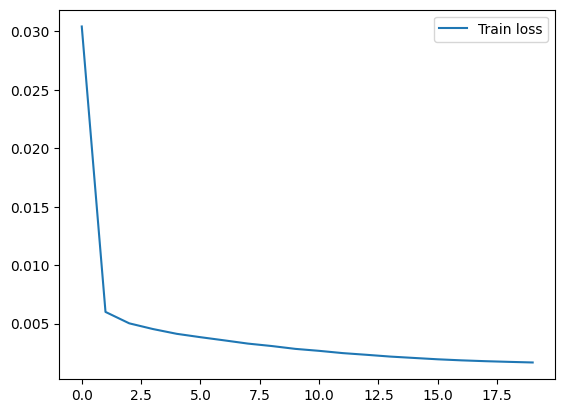

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.legend()
plt.show

In [ ]:
testPredict = model.predict(X_test)

783/783 [==============================] - 142s 182ms/step


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

testPredict_inv = sc.inverse_transform(testPredict)
y_test_inv = sc.inverse_transform(y_test)

r2_test = r2_score(y_test_inv,testPredict_inv)
rmse_test=np.sqrt(mean_squared_error(y_test_inv,testPredict_inv))

print('R2 Test: {:.3f}'.format(r2_test))
print('RMSE Test: {:.3f}'.format(rmse_test))

R2 Test: 0.977
RMSE Test: 32.186


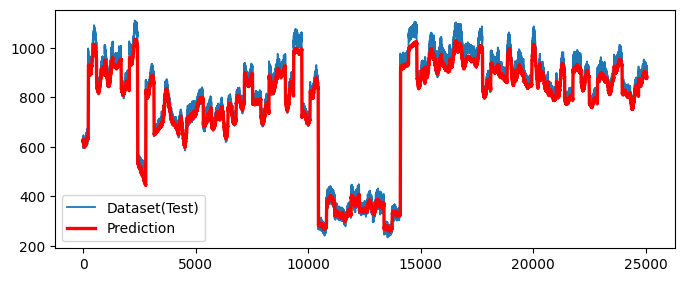

In [ ]:
plt.figure(figsize=(12-4,3.1))
plt.plot(y_test_inv,lw=1.3,label='Dataset(Test)')
plt.plot(testPredict_inv,'r',lw=2.4,label='Prediction')
plt.legend()
plt.show()

##LSTM

In [ ]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(step,1),activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=40,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error',optimizer='rmsprop')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 500, 50)           10400     
                                                                 
 dropout_2 (Dropout)         (None, 500, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 40)                14560     
                                                                 
 dropout_3 (Dropout)         (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
Total params: 25001 (97.66 KB)
Trainable params: 25001 (97.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history =  model.fit(X_train,y_train,epochs=20,batch_size=2048,verbose=1)

Epoch 1/20
113/113 [==============================] - 135s 1s/step - loss: 0.0166
Epoch 2/20
113/113 [==============================] - 132s 1s/step - loss: 0.0062
Epoch 3/20
113/113 [==============================] - 132s 1s/step - loss: 0.0053
Epoch 4/20
113/113 [==============================] - 131s 1s/step - loss: 0.0048
Epoch 5/20
113/113 [==============================] - 133s 1s/step - loss: 0.0043
Epoch 6/20
113/113 [==============================] - 132s 1s/step - loss: 0.0040
Epoch 7/20
113/113 [==============================] - 131s 1s/step - loss: 0.0037
Epoch 8/20
113/113 [==============================] - 131s 1s/step - loss: 0.0035
Epoch 9/20
113/113 [==============================] - 131s 1s/step - loss: 0.0033
Epoch 10/20
113/113 [==============================] - 130s 1s/step - loss: 0.0031
Epoch 11/20
113/113 [==============================] - 131s 1s/step - loss: 0.0030
Epoch 12/20
113/113 [==============================] - 130s 1s/step - loss: 0.0028
Epoch 13/20
1

<function matplotlib.pyplot.show(close=None, block=None)>

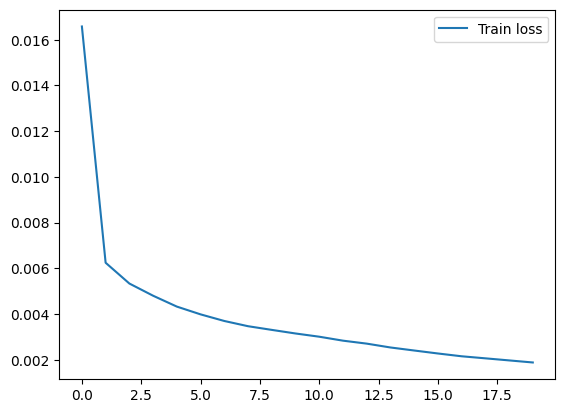

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.legend()
plt.show

In [ ]:
testPredict = model.predict(X_test)

783/783 [==============================] - 120s 153ms/step


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

testPredict_inv = sc.inverse_transform(testPredict)
y_test_inv = sc.inverse_transform(y_test)

r2_test = r2_score(y_test_inv,testPredict_inv)
rmse_test=np.sqrt(mean_squared_error(y_test_inv,testPredict_inv))

print('R2 Test: {:.3f}'.format(r2_test))
print('RMSE Test: {:.3f}'.format(rmse_test))

R2 Test: 0.984
RMSE Test: 26.942


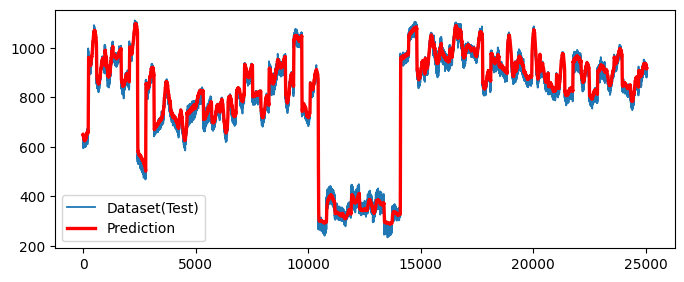

In [ ]:
plt.figure(figsize=(12-4,3.1))
plt.plot(y_test_inv,lw=1.3,label='Dataset(Test)')
plt.plot(testPredict_inv,'r',lw=2.4,label='Prediction')
plt.legend()
plt.show()

##CNN

!!!Codeที่สามารถใช้งานได้อยู่ใร acc รร

In [ ]:
print('X_Train,Test(after conversatiob):',X_train.shape,X_test.shape)
print('y_Train,Test(after conversatiob):',y_train.shape,y_test.shape)

X_Train,Test(after conversatiob): (229590, 500, 1) (25050, 500, 1)
y_Train,Test(after conversatiob): (229590, 1) (25050, 1)


Transform shape to 4d

In [ ]:
X_train_cnn = X_train.reshape(len(X_train),500,1,1)
X_test = X_test.reshape(len(X_test),500,1,1)

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential()

# model.add(LSTM(units=120,return_sequences=False,input_shape=(step,1),activation='relu'))
# model.add(Dropout(0.2))

#1. CNN LAYER
model.add(tf.keras.layers.Conv1D(filters = 250, kernel_size = 5, padding = 'Same', input_shape=(step,1), name = 'conv1d1'))
model.add(tf.keras.layers.BatchNormalization(name = 'batch_norm1'))
model.add(tf.keras.layers.Activation("relu", name = 'relu1'))
model.add(tf.keras.layers.Dropout(0.3, name = 'dropout1'))

#1.1 LSTM
# model.add(LSTM(units=40,return_sequences=False,activation='relu'))
# model.add(LSTM(units=120,return_sequences=True,input_shape=(step,1),activation='relu'))
# model.add(Dropout(0.2))
# model.add(LSTM(units=40,activation='relu'))

#2. CNN LAYER
# model.add(tf.keras.layers.Conv1D(filters = 60, kernel_size = 5, padding = 'Same', name = 'conv1d2'))
# model.add(tf.keras.layers.BatchNormalization(name = 'batch_norm2'))
# model.add(tf.keras.layers.Activation("relu", name = 'relu2'))

# model.add(tf.keras.layers.MaxPool2D(pool_size=(1, 1), name = 'maxpool2d1'))
# model.add(tf.keras.layers.Dropout(0.3, name = 'dropout2'))

# #3. CNN LAYER
# model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (1,1), padding = 'Same', name = 'conv2d3'))
# model.add(tf.keras.layers.BatchNormalization(name = 'batch_norm3'))
# model.add(tf.keras.layers.Activation("relu", name = 'relu3'))
# model.add(tf.keras.layers.Dropout(0.3, name = 'dropout3'))

# #4. CNN LAYER
# model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (1,1), padding = 'Same', name = 'conv2d4'))
# model.add(tf.keras.layers.BatchNormalization(name = 'batch_norm4'))
# model.add(tf.keras.layers.Activation("relu", name = 'relu4'))

# model.add(tf.keras.layers.MaxPool2D(pool_size=(1, 1), name = 'maxpool2d2'))
# model.add(tf.keras.layers.Dropout(0.3, name = 'dropout4'))


#FULLY CONNECTED LAYER
model.add(tf.keras.layers.Flatten(name = 'flatten1'))
model.add(tf.keras.layers.Dense(256, name = 'dense1'))
model.add(tf.keras.layers.BatchNormalization(name = 'batch_norm5'))
model.add(tf.keras.layers.Activation("relu", name = 'relu5'))
model.add(tf.keras.layers.Dropout(0.30, name = 'dropout5'))

#OUTPUT LAYER
model.add(tf.keras.layers.Dense(1, name = 'dense2'))

#COMPILE
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

In [ ]:
history =  model.fit(X_train,y_train,epochs=20,batch_size=2048,verbose=1)

Epoch 1/20
113/113 [==============================] - 27s 204ms/step - loss: 0.2370
Epoch 2/20
113/113 [==============================] - 23s 205ms/step - loss: 0.2370
Epoch 3/20
113/113 [==============================] - 23s 207ms/step - loss: 0.2370
Epoch 4/20
113/113 [==============================] - 23s 208ms/step - loss: 0.2370
Epoch 5/20
113/113 [==============================] - 24s 209ms/step - loss: 0.2370
Epoch 6/20
113/113 [==============================] - 24s 210ms/step - loss: 0.2370
Epoch 7/20
113/113 [==============================] - 24s 210ms/step - loss: 0.2370
Epoch 8/20
113/113 [==============================] - 24s 210ms/step - loss: 0.2370
Epoch 9/20
113/113 [==============================] - 24s 210ms/step - loss: 0.2370
Epoch 10/20
113/113 [==============================] - 24s 210ms/step - loss: 0.2370
Epoch 11/20
113/113 [==============================] - 24s 210ms/step - loss: 0.2370
Epoch 12/20
113/113 [==============================] - 24s 210ms/step - lo

<function matplotlib.pyplot.show(close=None, block=None)>

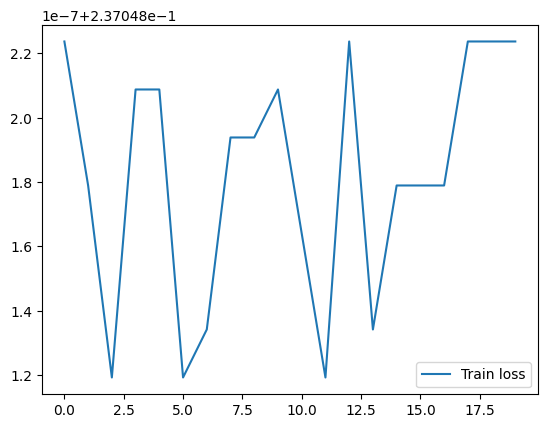

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.legend()
plt.show

In [ ]:
testPredict = model.predict(X_test)

783/783 [==============================] - 2s 2ms/step


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

testPredict_inv = sc.inverse_transform(testPredict)
y_test_inv = sc.inverse_transform(y_test)

r2_test = r2_score(y_test_inv,testPredict_inv)
rmse_test=np.sqrt(mean_squared_error(y_test_inv,testPredict_inv))

print('R2 Test: {:.3f}'.format(r2_test))
print('RMSE Test: {:.3f}'.format(rmse_test))

RMSE Test: 384.946


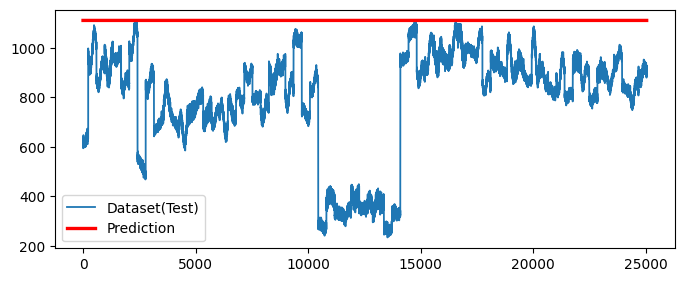

In [ ]:
plt.figure(figsize=(12-4,3.1))
plt.plot(y_test_inv,lw=1.3,label='Dataset(Test)')
plt.plot(testPredict_inv,'r',lw=2.4,label='Prediction')
plt.legend()
plt.show()